In [1]:
import pandas as pd

df = pd.read_csv("death1.csv")
df

,Cause,Type,Year,Data Redundancy,Total Deaths,Source,Page at Source,Source URL
0,Abrasi Air Laut,Bencana Alam,2012,1,0,Profil Kesehatan Indonesia Tahun 2012,Lampiran 3.38,https://pusdatin.kemkes.go.id/download.php?fil...
1,AIDS,Bencana Non Alam dan Penyakit,2000,1,47,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...
2,AIDS,Bencana Non Alam dan Penyakit,2001,1,99,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...
3,AIDS,Bencana Non Alam dan Penyakit,2002,1,100,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...
4,AIDS,Bencana Non Alam dan Penyakit,2003,1,261,Profil Kesehatan Indonesia Tahun 2010,115,https://pusdatin.kemkes.go.id/download.php?fil...
...,...,...,...,...,...,...,...,...
675,Wabah Penyakit (Epidemi),Bencana Non Alam dan Penyakit,2016,1,0,Profil Kesehatan Indonesia Tahun 2016,Lampiran 6.37,https://pusdatin.kemkes.go.id/download.php?fil...
676,Wabah Penyakit (Epidemi),Bencana Non Alam dan Penyakit,2017,1,0,Profil Kesehatan Indonesia Tahun 2017,Lampiran 6.43,https://pusdatin.kemkes.go.id/download.php?fil...
677,Wabah Penyakit (Epidemi),Bencana Non Alam dan Penyakit,2019,1,0,Profil Kesehatan Indonesia Tahun 2019,Lampiran 63.c,https://pusdatin.kemkes.go.id/download.php?fil...
678,Wabah Penyakit (Epidemi),Bencana Non Alam dan Penyakit,2020,1,0,Profil Kesehatan Indonesia Tahun 2020,191,https://pusdatin.kemkes.go.id/download.php?fil...


In [2]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df.isnull().sum()

Cause              0
Type               0
Year               0
Data Redundancy    0
Total Deaths       0
Source             0
Page at Source     0
Source URL         0
dtype: int64

In [3]:
q1 = df["Total Deaths"].quantile(0.25)
q3 = df["Total Deaths"].quantile(0.75)

iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

df_clean = df[(df["Total Deaths"] > lower_bound) & (df["Total Deaths"] < upper_bound)]
df_clean

,Cause,Type,Year,Data Redundancy,Total Deaths,Source,Page at Source,Source URL
0,Abrasi Air Laut,Bencana Alam,2012,1,0,Profil Kesehatan Indonesia Tahun 2012,Lampiran 3.38,https://pusdatin.kemkes.go.id/download.php?fil...
1,AIDS,Bencana Non Alam dan Penyakit,2000,1,47,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...
2,AIDS,Bencana Non Alam dan Penyakit,2001,1,99,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...
3,AIDS,Bencana Non Alam dan Penyakit,2002,1,100,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...
4,AIDS,Bencana Non Alam dan Penyakit,2003,1,261,Profil Kesehatan Indonesia Tahun 2010,115,https://pusdatin.kemkes.go.id/download.php?fil...
...,...,...,...,...,...,...,...,...
675,Wabah Penyakit (Epidemi),Bencana Non Alam dan Penyakit,2016,1,0,Profil Kesehatan Indonesia Tahun 2016,Lampiran 6.37,https://pusdatin.kemkes.go.id/download.php?fil...
676,Wabah Penyakit (Epidemi),Bencana Non Alam dan Penyakit,2017,1,0,Profil Kesehatan Indonesia Tahun 2017,Lampiran 6.43,https://pusdatin.kemkes.go.id/download.php?fil...
677,Wabah Penyakit (Epidemi),Bencana Non Alam dan Penyakit,2019,1,0,Profil Kesehatan Indonesia Tahun 2019,Lampiran 63.c,https://pusdatin.kemkes.go.id/download.php?fil...
678,Wabah Penyakit (Epidemi),Bencana Non Alam dan Penyakit,2020,1,0,Profil Kesehatan Indonesia Tahun 2020,191,https://pusdatin.kemkes.go.id/download.php?fil...


In [4]:
# one hot encoding
 
df_hot = pd.get_dummies(df_clean.copy(), columns=["Cause", "Type"])
df_hot

,Year,Data Redundancy,Total Deaths,Source,Page at Source,Source URL,Cause_AIDS,Cause_Abrasi Air Laut,Cause_Aksi Teror dan Sabotase,Cause_Angin Puting Beliung,...,Cause_Rubella,Cause_Tanah Longsor,Cause_Tersambar Petir,Cause_Tetanus,Cause_Tetanus Neonatorium,Cause_Tsunami,Cause_Wabah Penyakit (Epidemi),Type_Bencana Alam,Type_Bencana Non Alam dan Penyakit,Type_Bencana Sosial
0,2012,1,0,Profil Kesehatan Indonesia Tahun 2012,Lampiran 3.38,https://pusdatin.kemkes.go.id/download.php?fil...,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
1,2000,1,47,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,2001,1,99,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,2002,1,100,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,2003,1,261,Profil Kesehatan Indonesia Tahun 2010,115,https://pusdatin.kemkes.go.id/download.php?fil...,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675,2016,1,0,Profil Kesehatan Indonesia Tahun 2016,Lampiran 6.37,https://pusdatin.kemkes.go.id/download.php?fil...,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
676,2017,1,0,Profil Kesehatan Indonesia Tahun 2017,Lampiran 6.43,https://pusdatin.kemkes.go.id/download.php?fil...,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
677,2019,1,0,Profil Kesehatan Indonesia Tahun 2019,Lampiran 63.c,https://pusdatin.kemkes.go.id/download.php?fil...,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
678,2020,1,0,Profil Kesehatan Indonesia Tahun 2020,191,https://pusdatin.kemkes.go.id/download.php?fil...,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False


In [5]:
# label encoding

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_label = df_clean.copy()
df_label["Type"] = label_encoder.fit_transform(df_label["Type"])
df_label

,Cause,Type,Year,Data Redundancy,Total Deaths,Source,Page at Source,Source URL
0,Abrasi Air Laut,0,2012,1,0,Profil Kesehatan Indonesia Tahun 2012,Lampiran 3.38,https://pusdatin.kemkes.go.id/download.php?fil...
1,AIDS,1,2000,1,47,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...
2,AIDS,1,2001,1,99,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...
3,AIDS,1,2002,1,100,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...
4,AIDS,1,2003,1,261,Profil Kesehatan Indonesia Tahun 2010,115,https://pusdatin.kemkes.go.id/download.php?fil...
...,...,...,...,...,...,...,...,...
675,Wabah Penyakit (Epidemi),1,2016,1,0,Profil Kesehatan Indonesia Tahun 2016,Lampiran 6.37,https://pusdatin.kemkes.go.id/download.php?fil...
676,Wabah Penyakit (Epidemi),1,2017,1,0,Profil Kesehatan Indonesia Tahun 2017,Lampiran 6.43,https://pusdatin.kemkes.go.id/download.php?fil...
677,Wabah Penyakit (Epidemi),1,2019,1,0,Profil Kesehatan Indonesia Tahun 2019,Lampiran 63.c,https://pusdatin.kemkes.go.id/download.php?fil...
678,Wabah Penyakit (Epidemi),1,2020,1,0,Profil Kesehatan Indonesia Tahun 2020,191,https://pusdatin.kemkes.go.id/download.php?fil...


In [9]:
# normalisasi

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_normal = df_clean.copy()
df_normal[["Total Deaths"]] = scaler.fit_transform(df_normal[["Total Deaths"]])
df_normal

,Cause,Type,Year,Data Redundancy,Total Deaths,Source,Page at Source,Source URL
0,Abrasi Air Laut,Bencana Alam,2012,1,0.000000,Profil Kesehatan Indonesia Tahun 2012,Lampiran 3.38,https://pusdatin.kemkes.go.id/download.php?fil...
1,AIDS,Bencana Non Alam dan Penyakit,2000,1,0.066104,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...
2,AIDS,Bencana Non Alam dan Penyakit,2001,1,0.139241,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...
3,AIDS,Bencana Non Alam dan Penyakit,2002,1,0.140647,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...
4,AIDS,Bencana Non Alam dan Penyakit,2003,1,0.367089,Profil Kesehatan Indonesia Tahun 2010,115,https://pusdatin.kemkes.go.id/download.php?fil...
...,...,...,...,...,...,...,...,...
675,Wabah Penyakit (Epidemi),Bencana Non Alam dan Penyakit,2016,1,0.000000,Profil Kesehatan Indonesia Tahun 2016,Lampiran 6.37,https://pusdatin.kemkes.go.id/download.php?fil...
676,Wabah Penyakit (Epidemi),Bencana Non Alam dan Penyakit,2017,1,0.000000,Profil Kesehatan Indonesia Tahun 2017,Lampiran 6.43,https://pusdatin.kemkes.go.id/download.php?fil...
677,Wabah Penyakit (Epidemi),Bencana Non Alam dan Penyakit,2019,1,0.000000,Profil Kesehatan Indonesia Tahun 2019,Lampiran 63.c,https://pusdatin.kemkes.go.id/download.php?fil...
678,Wabah Penyakit (Epidemi),Bencana Non Alam dan Penyakit,2020,1,0.000000,Profil Kesehatan Indonesia Tahun 2020,191,https://pusdatin.kemkes.go.id/download.php?fil...


SPLITTING DATA

In [10]:
x = df_clean[["Cause", "Type"]] # fitur
y = df_clean["Total Deaths"] # target

In [15]:
from sklearn.model_selection import train_test_split

x_encoded = pd.get_dummies(x, columns=["Cause", "Type"])
y_norm = scaler.fit_transform(df_clean[["Total Deaths"]]).ravel()

x_train, x_test, y_train, y_test = train_test_split(x_encoded, y_norm, test_size = 0.2)

print(f"x train = {len(x_train)}, x test = {len(x_test)}")
print(f"y train = {len(y_train)}, x test = {len(y_test)}")

x train = 440, x test = 110
y train = 440, x test = 110


ASSIGNMENT

1

In [47]:
import pandas as pd

df = pd.read_csv("Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


2

In [48]:
df_copy = df.copy()
df_copy.dropna(inplace=True)
df_copy.drop_duplicates(inplace=True)

q1 = df_copy["Spending Score (1-100)"].quantile(0.25)
q3 = df_copy["Spending Score (1-100)"].quantile(0.75)

iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

df_clean = df_copy[(df_copy["Spending Score (1-100)"] > lower_bound) & (df_copy["Spending Score (1-100)"] < upper_bound)]
df_clean

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


3

In [49]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df_clean["Gender"] = encoder.fit_transform(df_clean["Gender"])
df_clean

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


4

In [50]:
from sklearn.preprocessing import MinMaxScaler

df_scaler = MinMaxScaler()
df_clean = df_clean.copy()
df_clean[["Annual Income (k$)", "Spending Score (1-100)"]] = df_scaler.fit_transform(df_clean[["Annual Income (k$)", "Spending Score (1-100)"]])
df_clean

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,0.000000,0.387755
1,2,1,21,0.000000,0.816327
2,3,0,20,0.008197,0.051020
3,4,0,23,0.008197,0.775510
4,5,0,31,0.016393,0.397959
...,...,...,...,...,...
195,196,0,35,0.860656,0.795918
196,197,0,45,0.909836,0.275510
197,198,1,32,0.909836,0.744898
198,199,1,32,1.000000,0.173469


5

In [51]:
x = df_clean[["Gender", "Age", "Annual Income (k$)"]]
y = df_clean[["Spending Score (1-100)"]]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
print(f"x train = {len(x_train)}, x test = {len(x_test)}")
print(f"y train = {len(y_train)}, x test = {len(y_test)}")

x train = 160, x test = 40
y train = 160, x test = 40


6

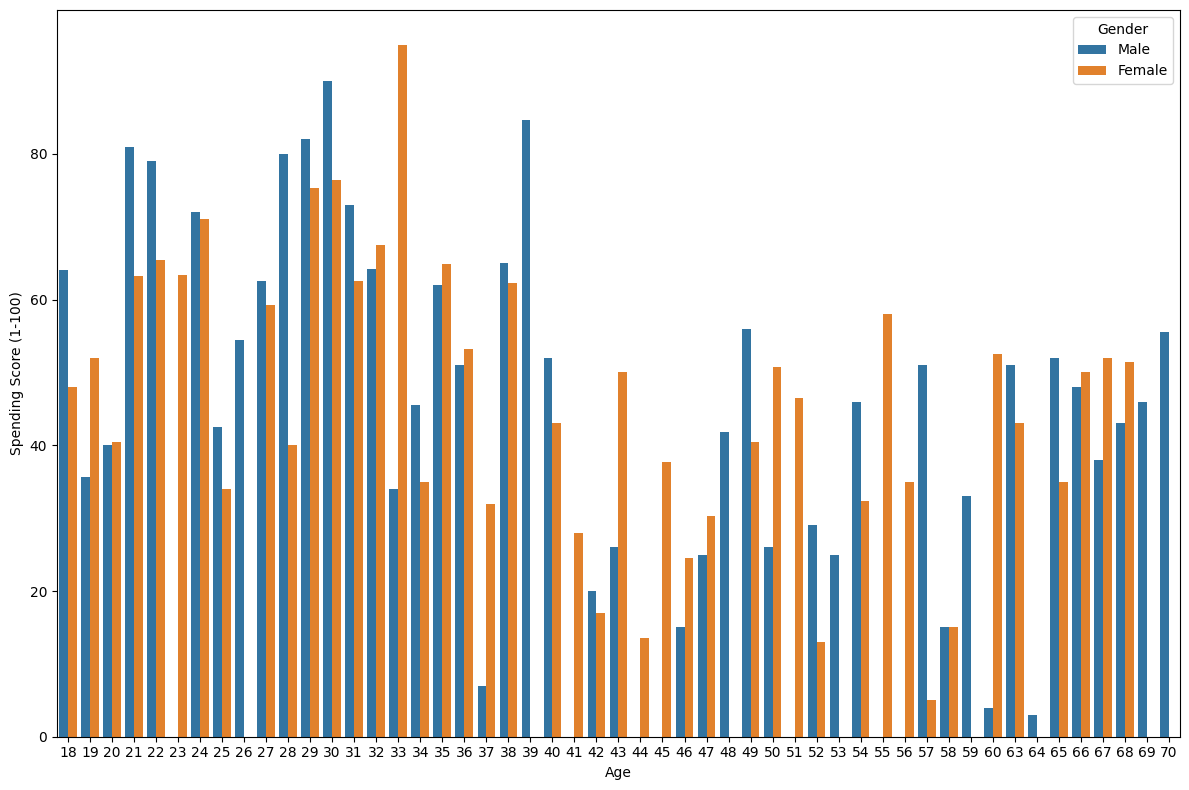

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

df_clean["Gender"] = encoder.inverse_transform(df_clean["Gender"])
df_clean[["Annual Income (k$)", "Spending Score (1-100)"]] = df_scaler.inverse_transform(df_clean[["Annual Income (k$)", "Spending Score (1-100)"]])

plt.figure(figsize=(12, 8))
sns.barplot(x = "Age", y = "Spending Score (1-100)", hue = "Gender", data = df_clean, errorbar=None)
plt.tight_layout()
plt.show()